In [1]:
from datetime import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [3]:
# filling missing value with 0
df['Postal Code'] = df['Postal Code'].fillna(0)


In [4]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [5]:
result = df.groupby('Category')['Sales'].sum()
result.head()


Category
Furniture          728658.5757
Office Supplies    705422.3340
Technology         827455.8730
Name: Sales, dtype: float64

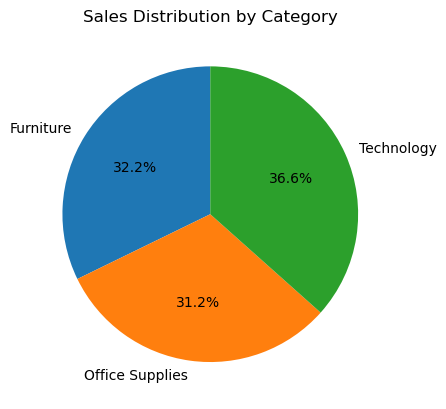

In [6]:

# Ensure result is a DataFrame
result = df.groupby('Category')['Sales'].sum().reset_index()

# Plotting the pie chart
plt.pie(result['Sales'],labels=result['Category'],autopct='%1.1f%%',startangle=90)

# Adding a title
plt.title('Sales Distribution by Category')

# Show the plot
plt.show()



## Now find the the Average Sales per day





In [7]:
df.head(3)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [8]:
df['Order Date'] = df['Order Date'].str.strip() #striping data from both side

#pd.to_datetime(df['Order Date'])
def swapvalues(s): # changing the date format so that we can further use apply in datetime
    s = s.split('/')
    return f"{s[2]}-{s[1]}-{s[0]}"
    
#df['Order Date'] = df['Order Date'].apply(lambda x: swapvalues(x))
df['Ship Date'] = df['Ship Date'].apply(lambda x: swapvalues(x))
df['Order Date'] = df['Order Date'].apply(lambda x: swapvalues(x))
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [9]:
# changing the dtypes to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [10]:
result = df.groupby(df['Order Date'].dt.day)['Sales'].sum().reset_index()
res = result['Sales'].sum()/result['Sales'].count()
result.describe()

,Order Date,Sales
count,31.000000,31.000000
mean,16.000000,72952.799442
std,9.092121,16026.563846
min,1.000000,44334.426700
25%,8.500000,63792.888700
50%,16.000000,69898.686600
75%,23.500000,79182.633100
max,31.000000,111719.934200


In [11]:
print(res)


72952.79944193548


### Ans: Average Sales per day is 72952.7994

### Which day my sales is maximum

<Axes: xlabel='Order Date', ylabel='Sales'>

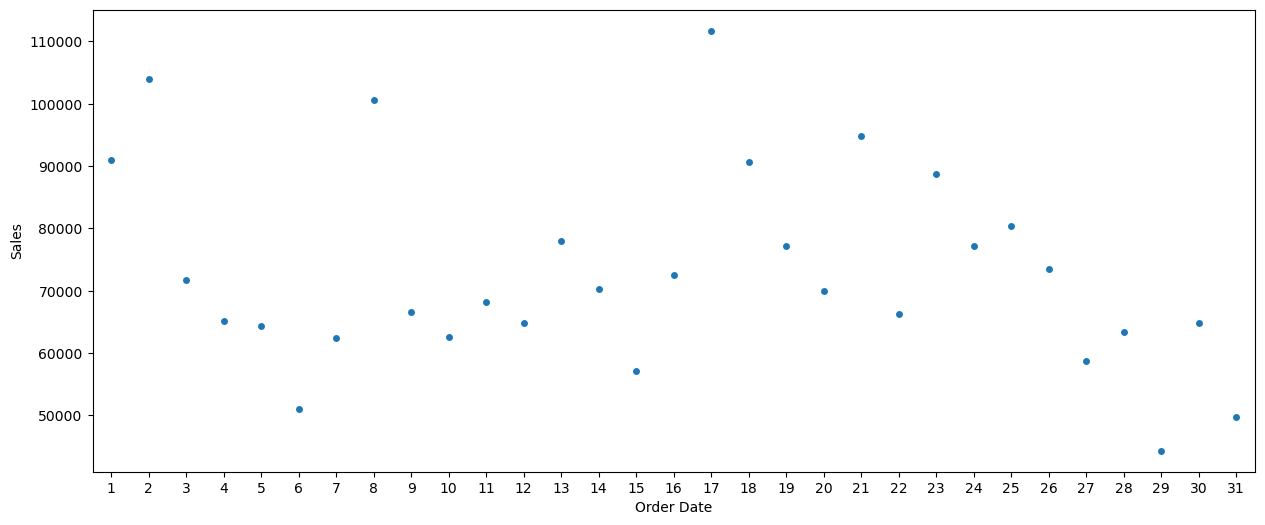

In [12]:
plt.figure(figsize=(15, 6))
sns.stripplot(data=result,x='Order Date',y='Sales')

### Ans 17 day of a month

In [13]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


### Which City have Highest Sales

In [14]:
city_sales = df.groupby('City')['Sales'].sum().reset_index()


max_sales_city = city_sales.nlargest(1, 'Sales')
max_sales_city.head()


,City,Sales
327,New York City,252462.547


#### Ans City -> New York City , Sales -> 252462.547

In [15]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


### Which is the highest sales month

In [16]:
monthly_sales = df.groupby(df['Order Date'].dt.month)['Sales'].sum().reset_index()
monthly_sales.nlargest(1,'Sales')

,Order Date,Sales
10,11,350161.711


#### Ans -> Highest Selling Month is November

### What is the Average Order Processing time

In [17]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [18]:
difference_date = df['Ship Date'].dt.day - df['Order Date'].dt.day

In [19]:
difference_date = pd.DataFrame(difference_date)
difference_date.describe()

,0
count,9800.00000
mean,0.40898
std,9.67124
min,-30.00000
25%,2.00000
50%,4.00000
75%,5.00000
max,7.00000


In [20]:

cnt = 0
def call(x):
    global cnt
    if x > 0:
        cnt+=1
df['Difference Date of month'] = df['Ship Date'].dt.month - df['Order Date'].dt.month
df['Difference Date of month'].apply(lambda x: call(x))
df[df['Difference Date of month'] > 0]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Difference Date of month
18,19,CA-2015-143336,2015-08-27,2015-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,California,94109.0,West,OFF-AR-10003056,Office Supplies,Art,Newell 341,8.560,1
19,20,CA-2015-143336,2015-08-27,2015-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,California,94109.0,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480,1
20,21,CA-2015-143336,2015-08-27,2015-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,California,94109.0,West,OFF-BI-10002215,Office Supplies,Binders,"Wilson Jones Hanging View Binder, White, 1""",22.720,1
66,67,US-2016-164175,2016-04-30,2016-05-05,Standard Class,PS-18970,Paul Stevenson,Home Office,United States,Chicago,Illinois,60610.0,Central,FUR-CH-10001146,Furniture,Chairs,"Global Value Mid-Back Manager's Chair, Gray",213.115,1
72,73,US-2016-134026,2016-04-26,2016-05-02,Standard Class,JE-15745,Joel Eaton,Consumer,United States,Memphis,Tennessee,38109.0,South,FUR-CH-10000513,Furniture,Chairs,High-Back Leather Manager's Chair,831.936,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9784,9785,CA-2016-149748,2016-05-31,2016-06-02,Second Class,EM-13825,Elizabeth Moffitt,Corporate,United States,Paterson,New Jersey,7501.0,East,FUR-FU-10001847,Furniture,Furnishings,Eldon Image Series Black Desk Accessories,8.280,1
9787,9788,CA-2018-144491,2018-03-27,2018-04-01,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Houston,Texas,77070.0,Central,FUR-BO-10001811,Furniture,Bookcases,"Atlantic Metals Mobile 5-Shelf Bookcases, Cust...",1023.332,1
9788,9789,CA-2018-144491,2018-03-27,2018-04-01,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Houston,Texas,77070.0,Central,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,600.558,1
9789,9790,CA-2018-144491,2018-03-27,2018-04-01,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Houston,Texas,77070.0,Central,TEC-AC-10004901,Technology,Accessories,Kensington SlimBlade Notebook Wireless Mouse w...,39.992,1


In [21]:
df[df['Difference Date of month']<0]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Difference Date of month
270,271,CA-2018-163979,2018-12-28,2019-01-02,Second Class,KH-16690,Kristen Hastings,Corporate,United States,San Francisco,California,94110.0,West,OFF-ST-10003208,Office Supplies,Storage,Adjustable Depth Letter/Legal Cart,725.840,-11
305,306,CA-2015-130960,2015-12-30,2016-01-04,Standard Class,KB-16600,Ken Brennan,Corporate,United States,Taylor,Michigan,48180.0,Central,OFF-AR-10003651,Office Supplies,Art,Newell 350,9.840,-11
525,526,CA-2016-158792,2016-12-26,2017-01-02,Standard Class,BD-11605,Brian Dahlen,Consumer,United States,Lawrence,Massachusetts,1841.0,East,OFF-FA-10002815,Office Supplies,Fasteners,Staples,22.200,-11
570,571,CA-2018-164826,2018-12-28,2019-01-04,Standard Class,JF-15415,Jennifer Ferguson,Consumer,United States,New York City,New York,10024.0,East,OFF-LA-10001297,Office Supplies,Labels,Avery 473,72.450,-11
571,572,CA-2018-164826,2018-12-28,2019-01-04,Standard Class,JF-15415,Jennifer Ferguson,Consumer,United States,New York City,New York,10024.0,East,OFF-FA-10000585,Office Supplies,Fasteners,OIC Bulk Pack Metal Binder Clips,13.960,-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8763,8764,CA-2017-112578,2017-12-29,2018-01-02,Standard Class,FO-14305,Frank Olsen,Consumer,United States,Sacramento,California,95823.0,West,OFF-SU-10002557,Office Supplies,Supplies,Fiskars Spring-Action Scissors,27.960,-11
8803,8804,CA-2015-157644,2015-12-31,2016-01-01,First Class,AH-10030,Aaron Hawkins,Corporate,United States,New York City,New York,10035.0,East,TEC-AC-10003614,Technology,Accessories,Verbatim 25 GB 6x Blu-ray Single Layer Recorda...,34.770,-11
8804,8805,CA-2015-157644,2015-12-31,2016-01-01,First Class,AH-10030,Aaron Hawkins,Corporate,United States,New York City,New York,10035.0,East,OFF-LA-10003148,Office Supplies,Labels,Avery 51,18.900,-11
8968,8969,CA-2015-166730,2015-12-30,2016-01-01,First Class,DD-13570,Dorothy Dickinson,Consumer,United States,Memphis,Tennessee,38109.0,South,OFF-ST-10002554,Office Supplies,Storage,Tennsco Industrial Shelving,39.128,-11


In [22]:

df['diffdays'] = df['Ship Date'] - df['Order Date']
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Difference Date of month,diffdays
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,0,3 days
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,0,3 days
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,0,4 days
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,0,7 days
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,0,7 days


In [23]:
df = df.drop(columns='Difference Date of month') # deleting previous  unwanted record

In [24]:
def convert(x):
    return x.days
    
df['diffdays'] = df['diffdays'].apply(lambda x : convert(x))
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,diffdays
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,3
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,7


In [25]:
df['diff_days'] = (df['Ship Date'] - df['Order Date']).dt.days
df.head(3)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,diffdays,diff_days
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,3,3
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,3
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,4,4


In [26]:
#df = df.drop(columns='diffdays')

df['totaldays'] = df['diff_days'] + (df['Ship Date'].dt.month - df['Order Date'].dt.month) * 30 # changing month to days to find total days gap
df['totaldays'].sum()/df['totaldays'].count()

1.9743877551020408

## Ans -> Average Order processing time is 1.97 which is 2 days

## Which dates or months do customers order the most?

In [27]:
monthly_sales = df.groupby(df['Order Date'].dt.month)['Order ID'].count().reset_index()
monthly_sales.nlargest(1,'Order ID')

,Order Date,Order ID
10,11,1449


### Ans -> November is the month where customer order the most

## What is the best selling product on each category

In [28]:
category_sales = df.groupby(['Category','Product Name'])['Sales'].sum().reset_index() # first group by with sales

In [29]:
g = category_sales.groupby('Category')
g.max()

,Product Name,Sales
Category,,
Furniture,Westinghouse Mesh Shade Clip-On Gooseneck Lamp...,21870.576
Office Supplies,Zipper Ring Binder Pockets,27453.384
Technology,netTALK DUO VoIP Telephone Service,61599.824


### Ans-> here is the answer of the best selling product on each category


## What is the average time between order date and ship date for each shipping mode?


In [30]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,diffdays,diff_days,totaldays
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,3,3,3
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,3,3
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,4,4,4


In [31]:
grouped = df.groupby('Ship Mode')['totaldays']
grouped.sum()/grouped.count()


Ship Mode
First Class       1.979347
Same Day          0.044610
Second Class      1.671924
Standard Class    2.248507
Name: totaldays, dtype: float64

### Ans-> this is the answer of the average time between order date and ship date for each shipping mode...


In [32]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,diffdays,diff_days,totaldays
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,3,3,3
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,3,3
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,4,4,4


## Which sub-category of products generates the highest revenue?

In [33]:
sub_category_sales = df.groupby('Sub-Category')['Sales'].sum()
maxsubcategory = sub_category_sales.idxmax()
print(f"{maxsubcategory} : {sub_category_sales[maxsubcategory]}")

Phones : 327782.448


### Ans -> Phones is the sub-category of products which generates the highest revenue..


In [34]:
def splits(strs,chars = ' '):
    lst = []
    temp = ""
    for i in strs:
        if i == chars:
            if temp != "":
                lst.append(temp)
            temp = ""
        else:
            temp+=i
    if temp != "" : lst.append(temp)
    return lst
strs = "i am a python coder    "
splits(strs)

['i', 'am', 'a', 'python', 'coder']

## How many unique customers are there in each region?

In [35]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,diffdays,diff_days,totaldays
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,3,3,3
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,3,3
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,4,4,4


In [79]:
unique_value_region = df.groupby('Region')['Customer ID'].nunique().reset_index()
unique_value_region.head()


,Region,Customer ID
0,Central,626
1,East,669
2,South,509
3,West,681


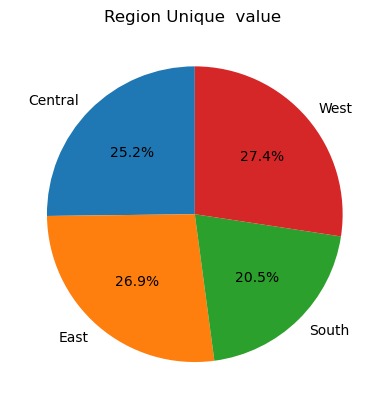

In [80]:

plt.pie(unique_value_region['Customer ID'],labels=unique_value_region['Region'],autopct='%1.1f%%',startangle=90)

# Adding a title
plt.title('Region Unique  value ')

# Show the plot
plt.show()


In [81]:
unique_value_region.head()

,Region,Customer ID
0,Central,626
1,East,669
2,South,509
3,West,681


### Above is the answer of unique Customer according to the Region


## What is the average time between order date and ship date for each shipping mode?

In [37]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,diffdays,diff_days,totaldays
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,3,3,3
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,3,3
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4,4,4
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7,7,7
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,7,7,7


In [45]:
avgshipmode = df.groupby('Ship Mode')['totaldays'].mean().reset_index()

### Ans -> Answer is above 


<Axes: xlabel='Ship Mode', ylabel='totaldays'>

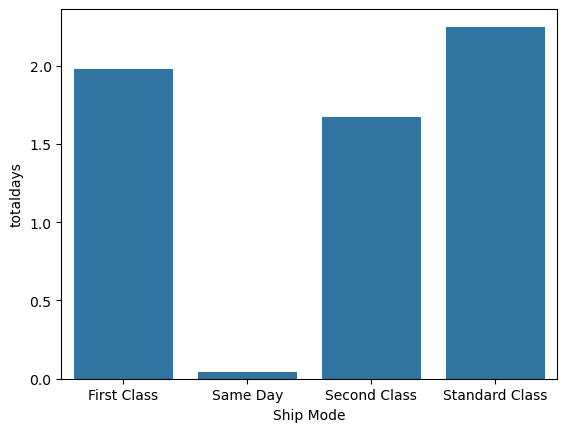

In [49]:
sns.barplot(x = avgshipmode['Ship Mode'],y=avgshipmode['totaldays'])